# Group proposal

### Introduction 

- Provide some relevant background information on the topic so that someone unfamiliar with it will be prepared to understand the rest of your proposal
- Clearly state the question you will try to answer with your project
- Identify and describe the dataset that will be used to answer the question


Predictive question: 
- Given measurements of ______ , Does the paitent has heart diease (i.e presence or absence o heart diease)? 

## Preliminary exploratory data analysis:
- Demonstrate that the dataset can be read from the web into R 
- Clean and wrangle your data into a tidy format
- Using only training data, summarize the data in at least one table (this is exploratory data analysis). An example of a useful table could be one that reports the number of observations in each class, the means of the predictor variables you plan to use in your analysis and how many rows have missing data. 
- Using only training data, visualize the data with at least one plot relevant to the analysis you plan to do (this is exploratory data analysis). An example of a useful visualization could be one that compares the distributions of each of the predictor variables you plan to use in your analysis.

## Preliminary exploratory data analysis:
### Loading libaray needed:
- to read data via url
- to clean and wrangle data
- to summarize and train data.

In [2]:
### Run this cell before continuing.
library(tidyverse)
library(repr)
library(tidymodels)
library(rvest)
options(repr.matrix.max.rows = 6) 
library(dplyr)
library(cowplot)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.1 ──

✔ ggplot2 3.3.6     ✔ purrr   0.3.4
✔ tibble  3.1.7     ✔ dplyr   1.0.9
✔ tidyr   1.2.0     ✔ stringr 1.4.0
✔ readr   2.1.2     ✔ forcats 0.5.1

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.0     ✔ rsample      1.0.0
✔ dials        1.0.0     ✔ tune         1.0.0
✔ infer        1.0.2     ✔ workflows    1.0.0
✔ modeldata    1.0.0     ✔ workflowsets 1.0.0
✔ parsnip      1.0.0     ✔ yardstick    1.0.0
✔ recipes      1.0.1     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks stringr::fixed()
✖ dplyr::lag()      masks stats::lag()
✖ yardstick::spec() masks r

### Load the data set
- use download.file to read dataset from the web into R

In [3]:
download.file("https://archive.ics.uci.edu/ml/machine-learning-databases/heart-disease/processed.cleveland.data", destfile = "data/cleveland.csv")
heart_disease_data <- read_csv("data/cleveland.csv", col_names = FALSE) 
heart_disease_data             

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,X11,X12,X13,X14
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>
63,1,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0
67,1,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2
67,1,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,1,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3
57,0,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1
38,1,3,138,175,0,0,173,0,0.0,1,?,3.0,0


### Clean the date set 
- adding columns name
- change sex from (1,0) to male vs female
- change the Range of num from (0-4) to (0-1).
   - Our main task is to classify to presence or absence of heart disease rather than the 4 levels of heart disease. 
   - Therefore, transform the heart disease level from 0 (0, absence of heart disease) to 1 (1,2,3,4 presence of heart disease)
   
   
Noted that every varible has its own column and each row is a single observation, each value is in the single cell. Therefore the date itself is a tidy data. 

In [6]:
#rename the columns name
heart_disease_data <- read_csv("data/cleveland.csv", col_names = FALSE) |>
                       rename( age = X1,
                               sex = X2,
                               cp = X3,
                               trestbps = X4,
                               chol = X5,
                               fbs = X6,
                               restecg = X7,
                              thalach = X8,
                              exang =  X9, 
                             oldpeak =  X10,
                             slope =  X11, 
                             ca = X12,
                             thal= X13,
                              num = X14)

Rows: 303 Columns: 14
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr  (2): X12, X13
dbl (12): X1, X2, X3, X4, X5, X6, X7, X8, X9, X10, X11, X14

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [7]:
heart_disease_data <- mutate(heart_disease_data, new_num = case_when(num == 0 ~ 0, num == 1| num == 2 | num == 3| num == 4 ~ 1))
heart_disease_data <- mutate(heart_disease_data, sex = case_when(sex == 0 ~ "male",sex == 1 ~ "female"))
heart_disease_data

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,new_num
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
63,female,1,145,233,1,2,150,0,2.3,3,0.0,6.0,0,0
67,female,4,160,286,0,2,108,1,1.5,2,3.0,3.0,2,1
67,female,4,120,229,0,2,129,1,2.6,2,2.0,7.0,1,1
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
57,female,4,130,131,0,0,115,1,1.2,2,1.0,7.0,3,1
57,male,2,130,236,0,2,174,0,0.0,2,1.0,3.0,1,1
38,female,3,138,175,0,0,173,0,0.0,1,?,3.0,0,0


### Split Data into traning Set and testing set.
Data Set was split into a training set and a testing set where the training Set is 75% of the original dataset and the testing Set is 25% of the original dataset.

In [14]:
hd_split <- initial_split(heart_disease_data, prop = 0.75, strata = new_num)  
hd_train <- training(hd_split)   
hd_test <- testing(hd_split)

## summarize the data

In [25]:
num_of_observation <- nrow(hd_train)
num_of_observation
print("we have 227 observation in our traning Set")
num_of_heart_disease <- hd_train |> 
                        group_by(new_num) |> 
                        summarise(count = n())

num_of_heart_disease

num_of_sex <- hd_train |> 
                        group_by(sex) |> 
                        summarise(count = n())
num_of_sex

[1] 227

[1] "we have 227 observation in our traning Set"


new_num,count
<dbl>,<int>
0,123
1,104


sex,count
<chr>,<int>
female,156
male,71


In our training data set, the group of people with absence heart disease and The group of presence have a close amount of total number. the female is the majority sex. 

In [13]:
sumOfData <- hd_train |> 
             select(age,trestbps,chol,thalach) |>
             summary()
sumOfData
print("Table 1 for summary of all numerical number")

      age           trestbps        chol          thalach     
 Min.   :29.00   Min.   : 94   Min.   :126.0   Min.   : 71.0  
 1st Qu.:48.00   1st Qu.:120   1st Qu.:211.0   1st Qu.:132.0  
 Median :55.00   Median :130   Median :239.0   Median :153.0  
 Mean   :54.32   Mean   :131   Mean   :245.1   Mean   :149.1  
 3rd Qu.:60.00   3rd Qu.:140   3rd Qu.:271.0   3rd Qu.:168.0  
 Max.   :76.00   Max.   :192   Max.   :564.0   Max.   :202.0  

[1] "Table 1 for summary of all numerical number"


**Analysing summary table**


For age, we can see our Range is from 29 years old to 76 years old. Observations are all adults. The 1st Quaturn said that 25%th people are 48 years old, which means the other 75% of people are over 48. The majority of our data set is people with age around 50 old or higher. 

For resting blood pressure (trestbps), the normal range for resting blood pressure is *under 120*. From the summary table, we can observe 1st Quaturn said that 25%th people have a blood pressure of 120 mm. The rest of the 75% of observations has higher blood pressure than normal health standards. 

For cholesterol level (chol), the mean value gives a 245.1 mg/dl cholesterol level which is considered a high cholesterol level, for more info can refer to the note. 

For maximum heart rate (thalach), since a normal healthy maximum heart rate is depending on the age, we can not say that much through the summary table because we don't have the reference of the age. 


**Note**

In general: A total cholesterol level of less than 200 mg/dL (5.17 mmol/L) is normal. A total cholesterol level of 200 to 239 mg/dL (5.17 to 6.18 mmol/L) is borderline high. A total cholesterol level of 240 mg/dL (6.21 mmol/L) or greater is high.

the cholestrol level standard is refer to : https://www.uptodate.com/contents/high-cholesterol-and-lipids-beyond-the-basics/print

### Finding Missing value

In [26]:
is.na(hd_train)
(num_of_missing_columns <- sum(is.na(hd_train)))
## Noted that there is no missing value so there is no rows with missing value



(row_with_question <- hd_train |> 
                    filter(thal == "?"))
## Noted that there is 2 row with "?" in variable thal, which means they dont have measurement of the thal 
## We should filter out those 2 row in our traning Set 
hd_train <- hd_train |> 
            filter(thal != "?")

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,new_num
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE
FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE,FALSE


[1] 0

age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num,new_num
<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>
53,male,3,128,216,0,2,115,0,0,1,0.0,?,0,0


## Visualizing Data
- show the ditribution of having heart disease among every categorical variable. 
- show the frequency of each numerical varible. 

#### For categorical varible  
- Show the distribution of each categorical variable in the Heart disease Group and No heart disease Group respectively.   

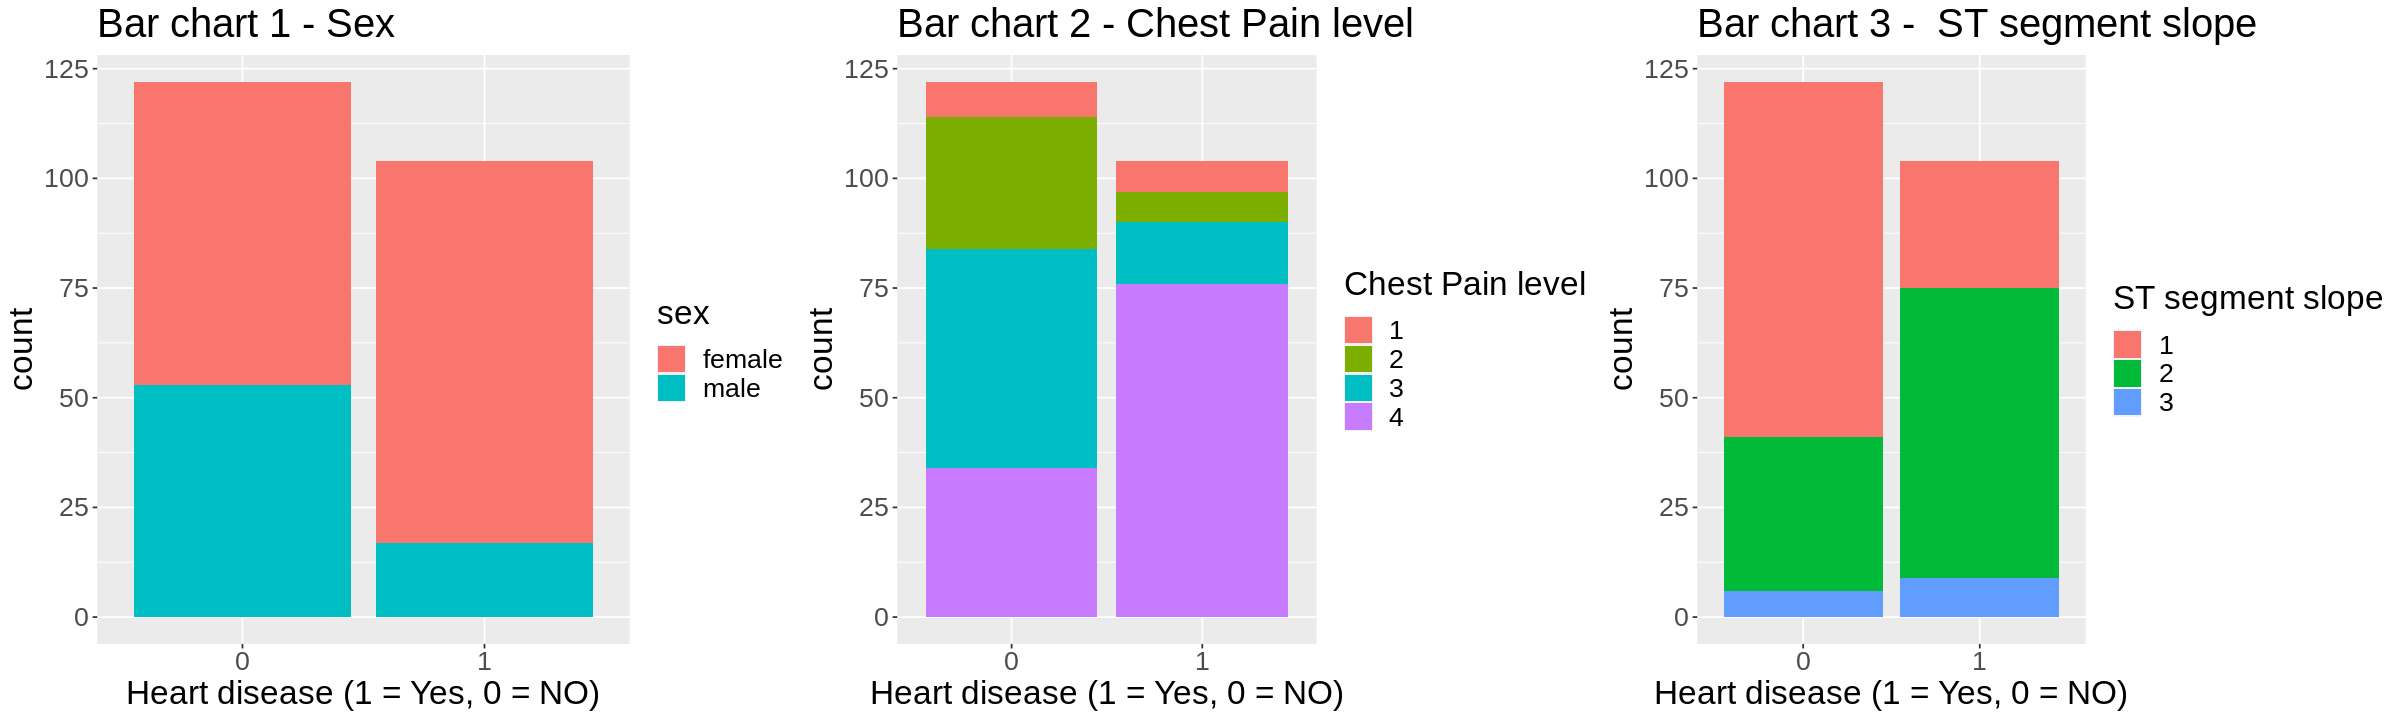

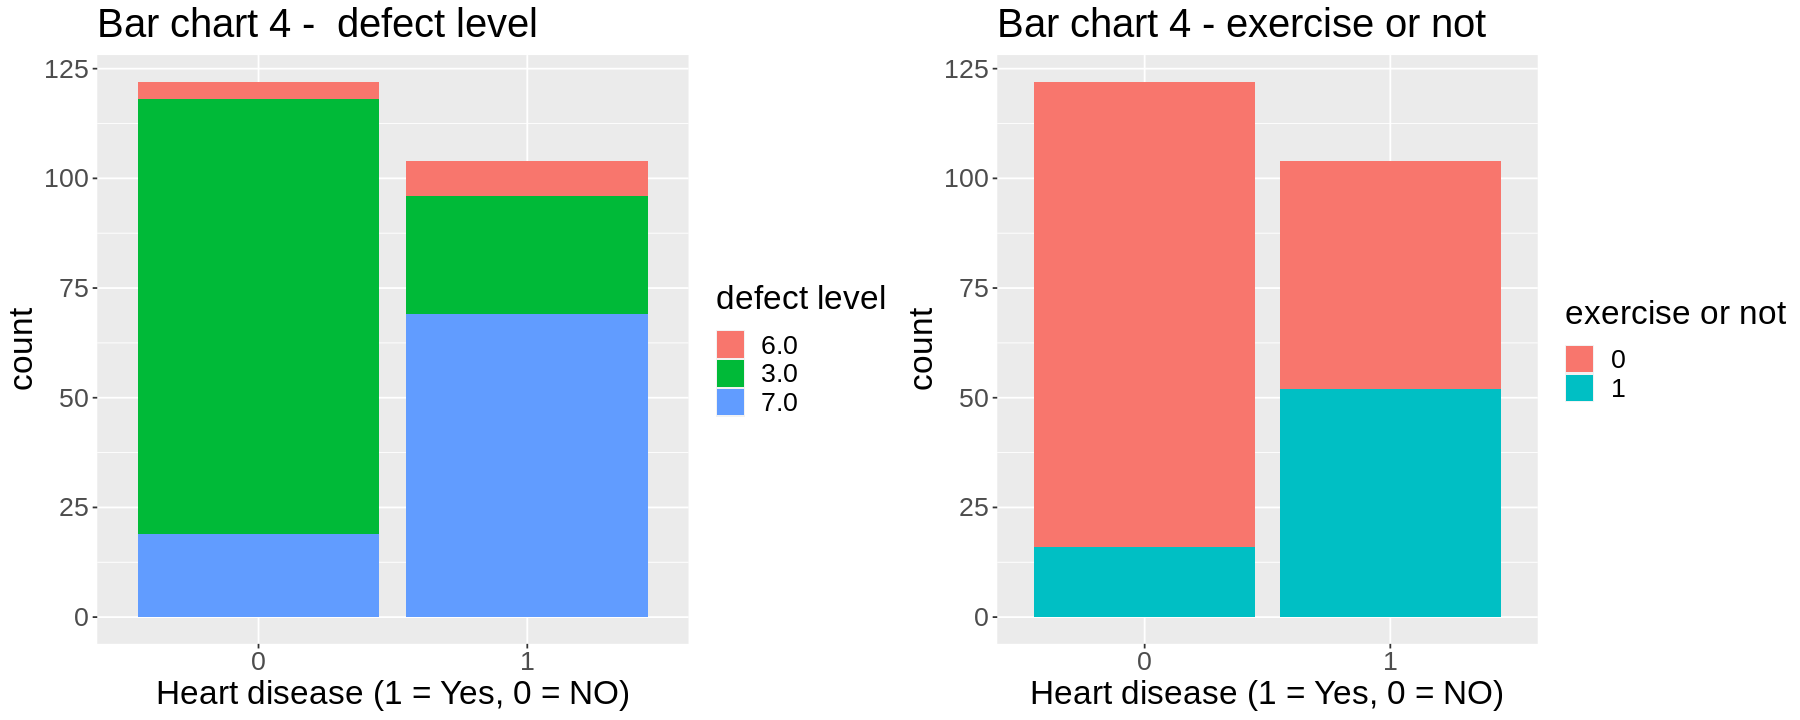

In [31]:
options(repr.plot.width = 20,repr.plot.height =6)
distofnumSex <- hd_train |>
ggplot(aes(x = as_factor(new_num), fill = sex)) +
labs(x = "Heart disease (1 = Yes, 0 = NO)") + 
geom_bar() +
theme(text = element_text(size = 20)) +
ggtitle("Bar chart 1 - Sex")


distofnum_CP <- hd_train |>
ggplot(aes(x = as_factor(new_num), fill = as_factor(cp))) +
labs(x = "Heart disease (1 = Yes, 0 = NO)", fill = "Chest Pain level") + 
geom_bar() +
theme(text = element_text(size = 20)) + 
ggtitle("Bar chart 2 - Chest Pain level")



distofnum_SLOPE <- hd_train |>
ggplot(aes(x = as_factor(new_num), fill = as_factor(slope))) +
labs(x = "Heart disease (1 = Yes, 0 = NO)", fill = "ST segment slope") + 
geom_bar() +
theme(text = element_text(size = 20)) + 
ggtitle("Bar chart 3 -  ST segment slope")
#the slope of the peak exercise ST segment

plot_grid(distofnumSex, distofnum_CP,distofnum_SLOPE,nrow = 1)

########################################################################
options(repr.plot.width = 15,repr.plot.height =6)

distofnum_thal <- hd_train |>
ggplot(aes(x = as_factor(new_num), fill = as_factor(thal))) +
labs(x = "Heart disease (1 = Yes, 0 = NO)", fill = "defect level") + 
geom_bar() +
theme(text = element_text(size = 20)) + 
ggtitle("Bar chart 4 -  defect level")

distofnum_exang <- hd_train |>
ggplot(aes(x = as_factor(new_num), fill = as_factor(exang))) +
labs(x = "Heart disease (1 = Yes, 0 = NO)", fill = "exercise or not") + 
geom_bar() +
theme(text = element_text(size = 20)) + 
ggtitle("Bar chart 4 - exercise or not")

#exercise induced angina (1 = yes; 0 = no)

plot_grid(distofnum_thal,distofnum_exang,nrow = 1)

**Analysing bar chart**

For Sex, in the presence of Heart disease, More female presences than men, compared to the equal distribution in the No Heart disease group

For the Chest Pain level, The 4th level of Chest levels has presence significantly more than the other level of Chest Pain in the Heart disease group. 

For ST-segment slope, The distribution of the value 2  of ST-segment slopes has considerable change between Heart disease and no heart disease. 

For defect level, 3 means normal; 6 means fixed defect; 7 means reversible defect.  Reversible defect shows significantly more in the heart disease group compared to less than 20% of a reversible defect in the no heart disease group.

For Bar chart 4, in the no Heart disease group, the majority is obversion with no exercising. 


#### For numeritcal Varible 
- use histogram shows basic trend of the varible based on our classification varible. 

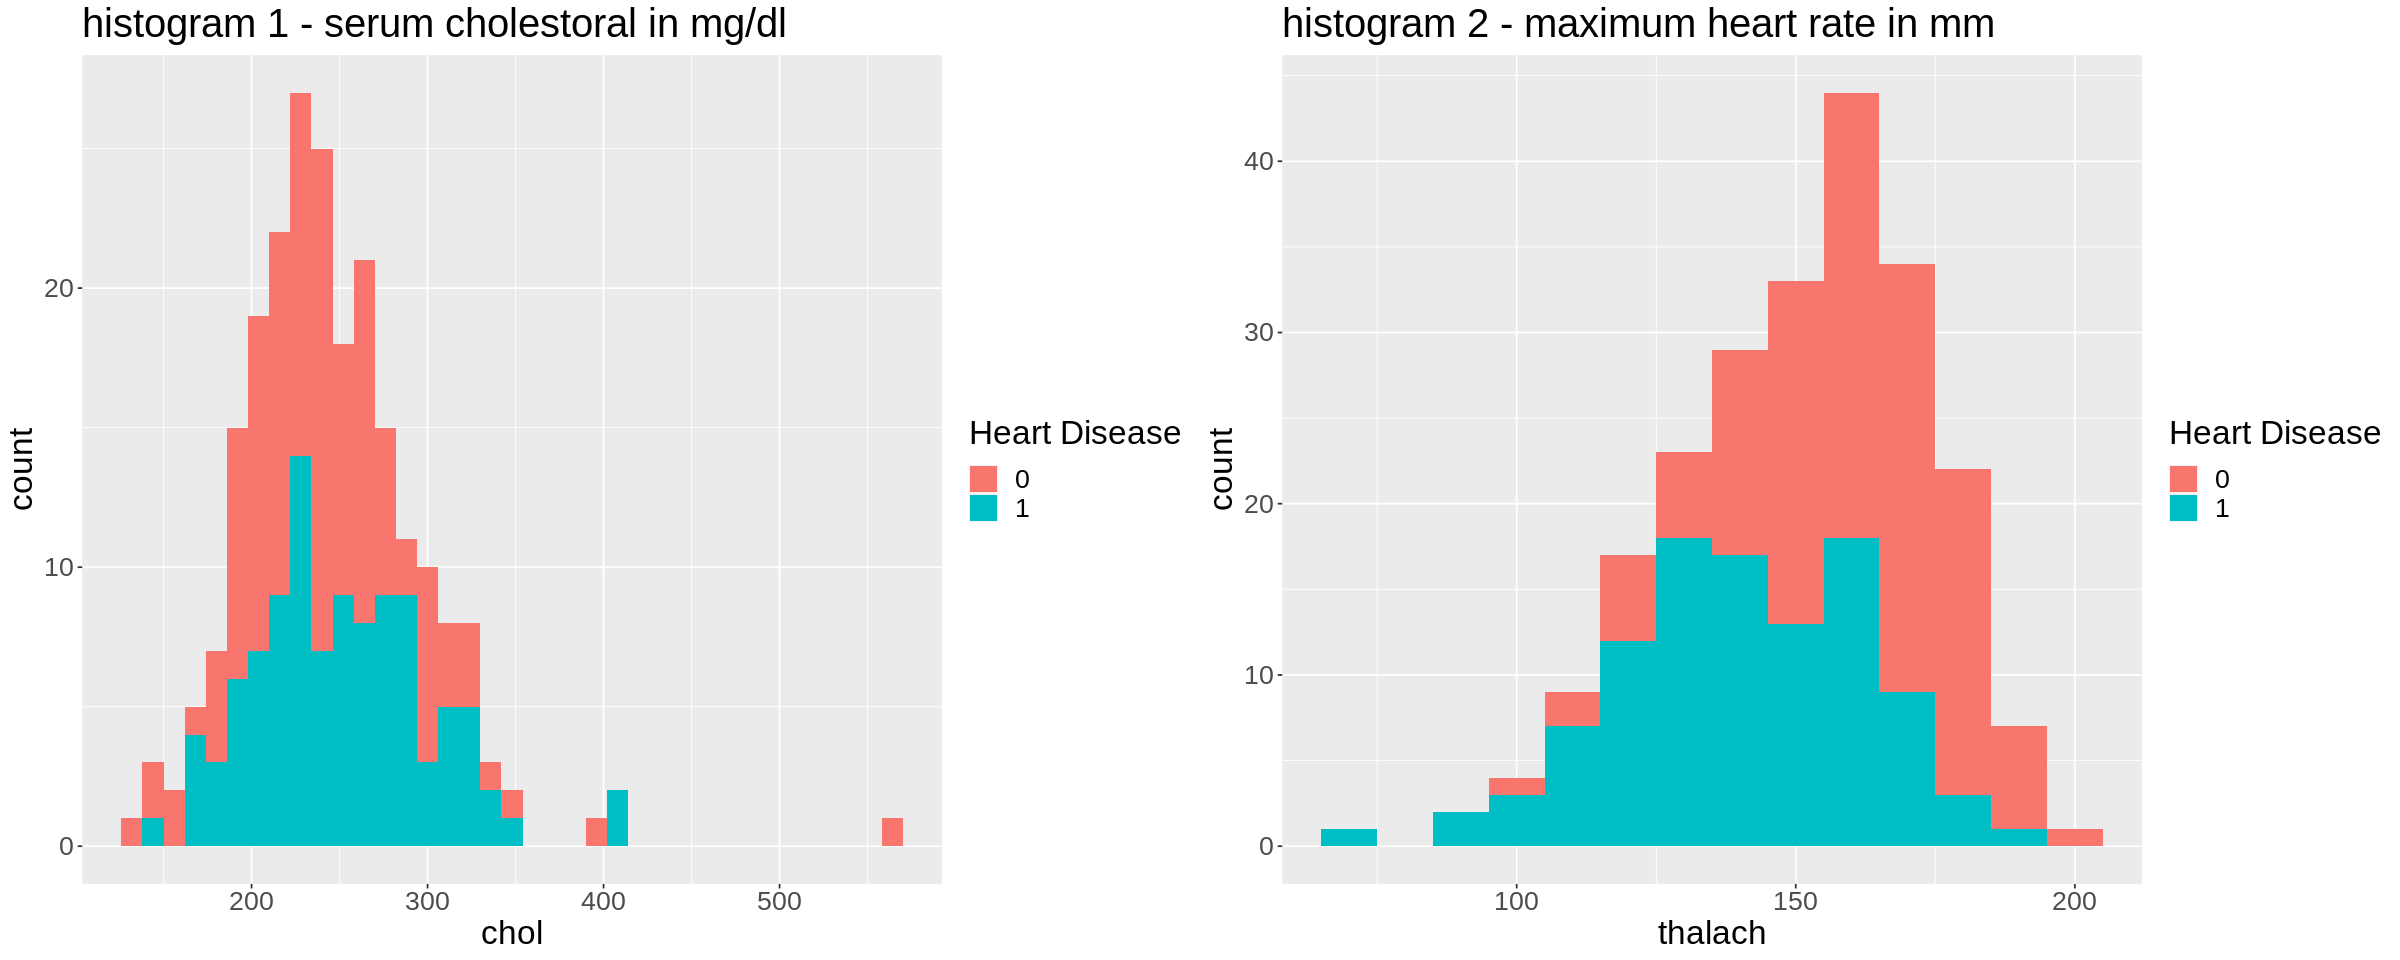

In [33]:

options(repr.plot.width = 20,repr.plot.height =8)

historgram_chol <- hd_train |>
ggplot(aes(x = chol,  fill = as_factor(new_num))) +
geom_histogram(binwidth = 12) +
labs(x = "chol", fill = "Heart Disease") +
theme(text = element_text(size = 20)) + 
ggtitle("histogram 1 - serum cholestoral in mg/dl ")


historgram_thalach <-  hd_train |>
ggplot(aes(x = thalach, fill = as_factor(new_num))) +
geom_histogram(binwidth = 10) +
labs(x = "thalach",fill = "Heart Disease") +
theme(text = element_text(size = 20)) + 
ggtitle("histogram 2 - maximum heart rate in mm")



plot_grid(historgram_chol, historgram_thalach,nrow = 1)

**Analysing histogram**

For histogram 1 - serum cholesterol, there is no obvious trend observed. 

For histogram 2 - in the lower maximum heart rate from 0 to around 120, the heart disease group dominates. There may be an association between a low heart rate and having heart disease. 


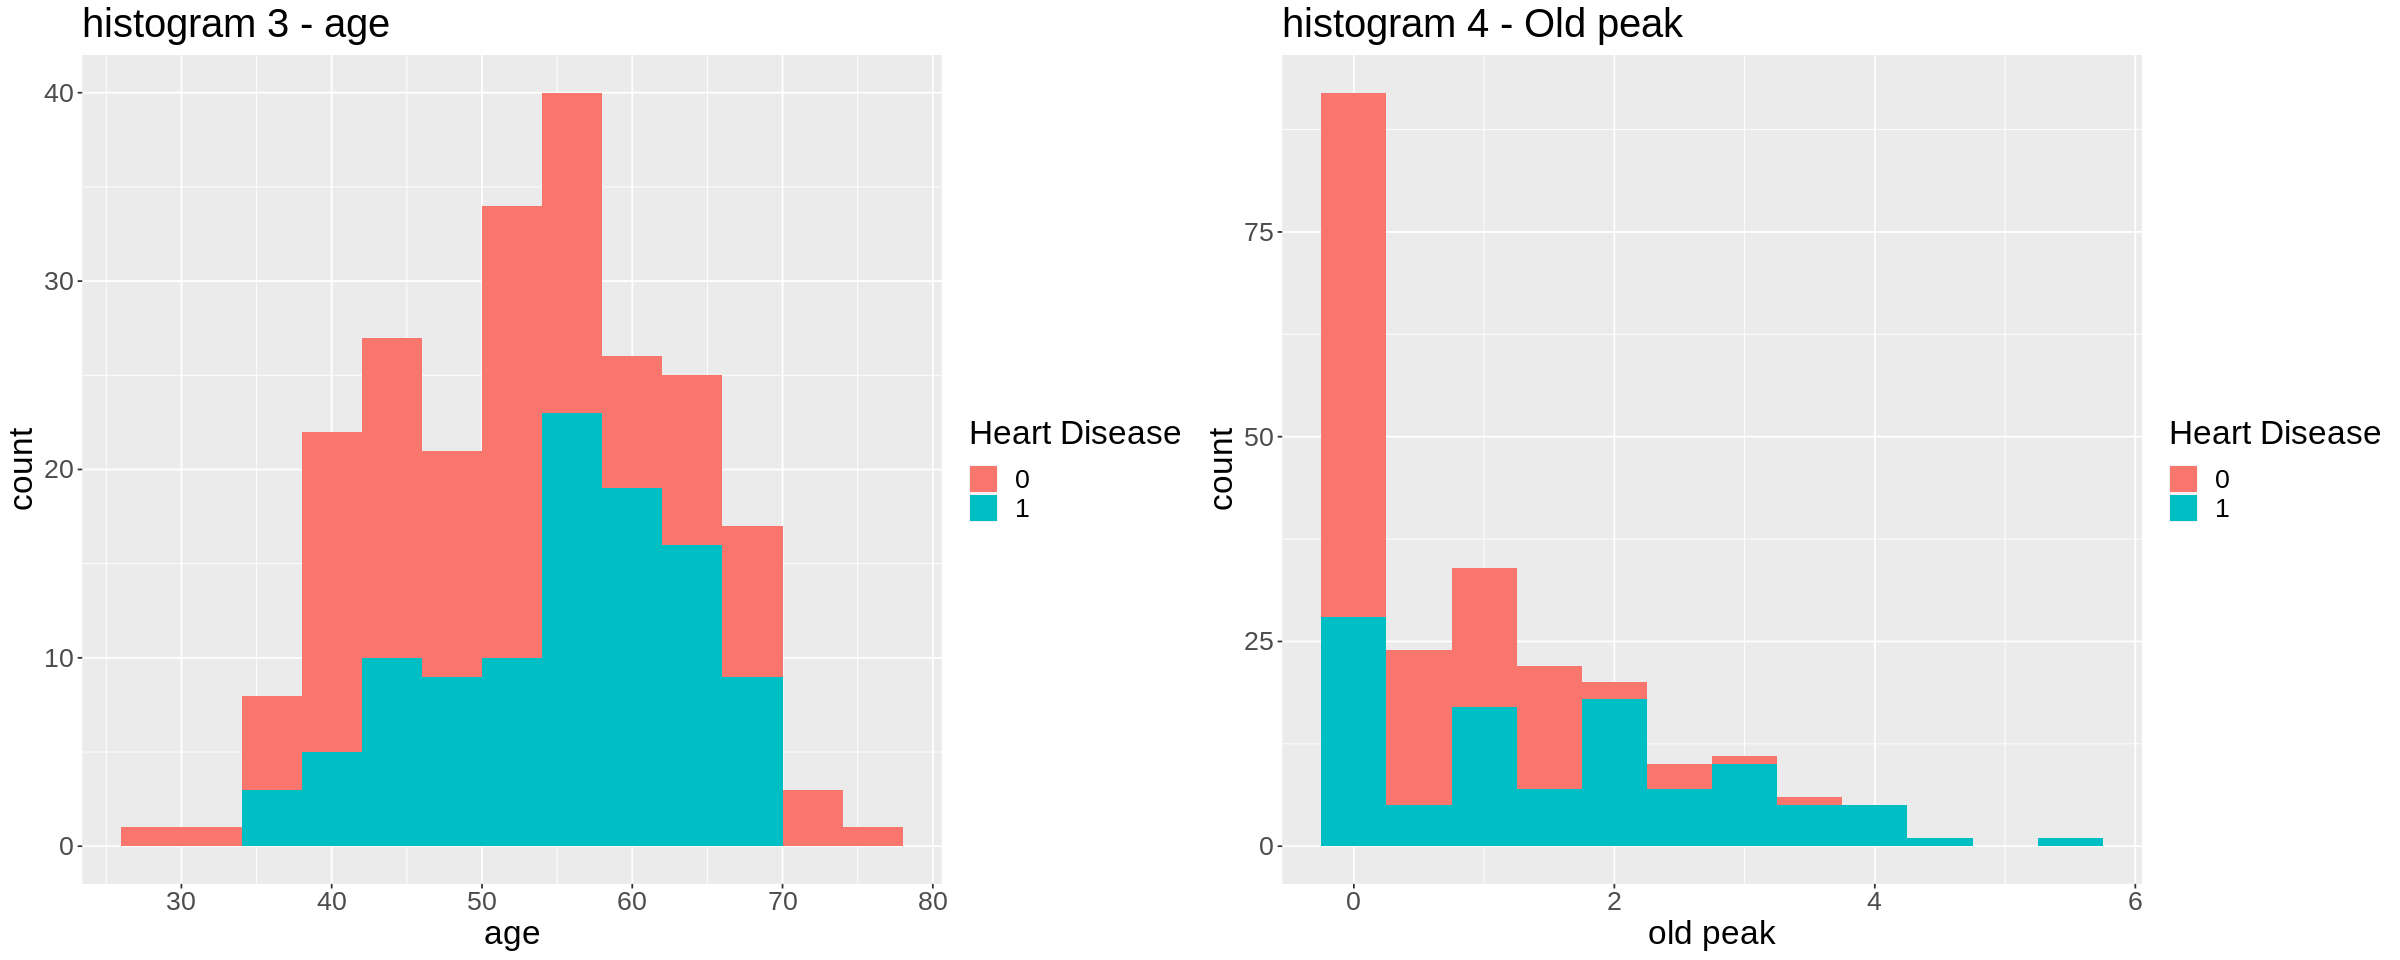

In [35]:

#options(repr.plot.width = 9,repr.plot.height =8)

historgram_age <- hd_train |>
ggplot(aes(x = age,  fill = as_factor(new_num))) +
geom_histogram(binwidth = 4) +
labs(x = "age", fill = "Heart Disease") +
theme(text = element_text(size = 20)) + 
ggtitle("histogram 3 - age ")

historgram_oldpeak <- hd_train |>
ggplot(aes(x = oldpeak,  fill = as_factor(new_num))) +
geom_histogram(binwidth = 0.5) +
labs(x = "old peak", fill = "Heart Disease") +
theme(text = element_text(size = 20)) + 
ggtitle("histogram 4 - Old peak ")

plot_grid(historgram_age, historgram_oldpeak,nrow = 1)

**Analysing histogram**

For histogram 3 - age, there is no obvious trend observed. 

For histogram 4 old peak- as the old peak approach to 2 and higher, the presence of heart disease is increased. 

### Methods:
Based on the bar plots representing each categorical variable and the distribution of heart disease results between them, we can choose the categorical variables to keep which seem to have an effect on heart disease. For this dataset, these would be sex, chest pain level, st segment slope, level of defect, and exercise.

We can also graph some side by side box-plots, conditioning on some of the previous categorical variables to see if any patterns appear, as from the histograms the distribution of values with and without heart disease seem to come from the same distribution. The histograms we used to investigate show that there seems to be a bias towards people who don't have heart disease, so we would look at proportions instead of comparing absolute values. From this, we would be able to investigate which numerical variables would be more impactful on our inference. Judging by the shape of the distributions there is some effect from all of the numerical variables on the distribution given heart disease.

After deciding on all the specific Then, we can use a KNN model, for which we can tune the K value via re-sampling, in order to model our data for specified parameters. With this model, we can use it to predict the expected outcomes from the test dataset.

We can visualize these results by displaying a histogram comparing two variables, then coloring the predicted area and the true area for positive results, which would allow us to see the difference between them. Also, we could compare using scatterplots the points which would be classified incorrectly via the model, and inspect these for any patterns to improve our model.

### Expected outcomes and significance:
- What do you expect to find?
- What impact could such findings have?
- What future questions could this lead to?